(306, 299)
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


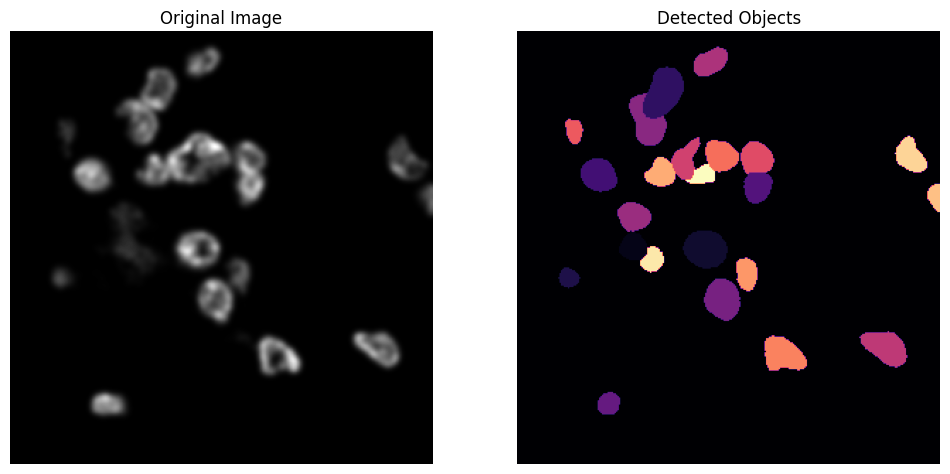

Final Image saved to stardist1.tif


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stardist.models import StarDist2D
from skimage.io import imread
from skimage.color import rgb2gray
import tifffile as tiff
from csbdeep.utils import normalize


# Load the input image (assuming it's a grayscale or RGB image)
image_path = r"C:\Users\colin\Downloads\Test1.tif"
image = imread(image_path)
# Print the shape of the image to verify it's OK
print(image.shape)

# Load a pre-trained StarDist model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

# Predict the star-convex shapes in the image
labels, details = model.predict_instances(normalize(image))

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the labeled image
plt.subplot(1, 2, 2)
plt.imshow(labels, cmap='magma')
plt.title('Detected Objects')
plt.axis('off')

plt.show()

# Save the labels to a 16-bit TIFF file
labels_16 = labels.astype(np.uint16)
file_path = 'stardist1.tif'
tiff.imwrite(file_path, labels_16)

print(f"Final Image saved to {file_path}")